# Objective :
### The dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price:

## 1. Explore this dataset using what you have learned in data preprocessing and data visualization

In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Downloads/kc_house_data.csv")
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
print(data.columns.values) #Information

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [6]:
print(data.isnull().sum()) #We don't have any null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [7]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Some Statistics about the Price !

In [9]:
price = data['price']

In [10]:
# Minimum price of the data
minimum_price = np.amin(price)
print(minimum_price)

75000.0


In [11]:
# Maximum price of the data
maximum_price = np.amax(price)
print(maximum_price)

7700000.0


In [12]:
# Mean price of the data
mean_price = np.mean(price)
print(mean_price)

540088.1417665294


In [13]:
# Median price of the data
median_price = np.median(price)
print(median_price)

450000.0


In [14]:
# Standard deviation of prices of the data
std_price = np.std(price)
print(std_price)

367118.7031813722


## Now Some Visualizations !

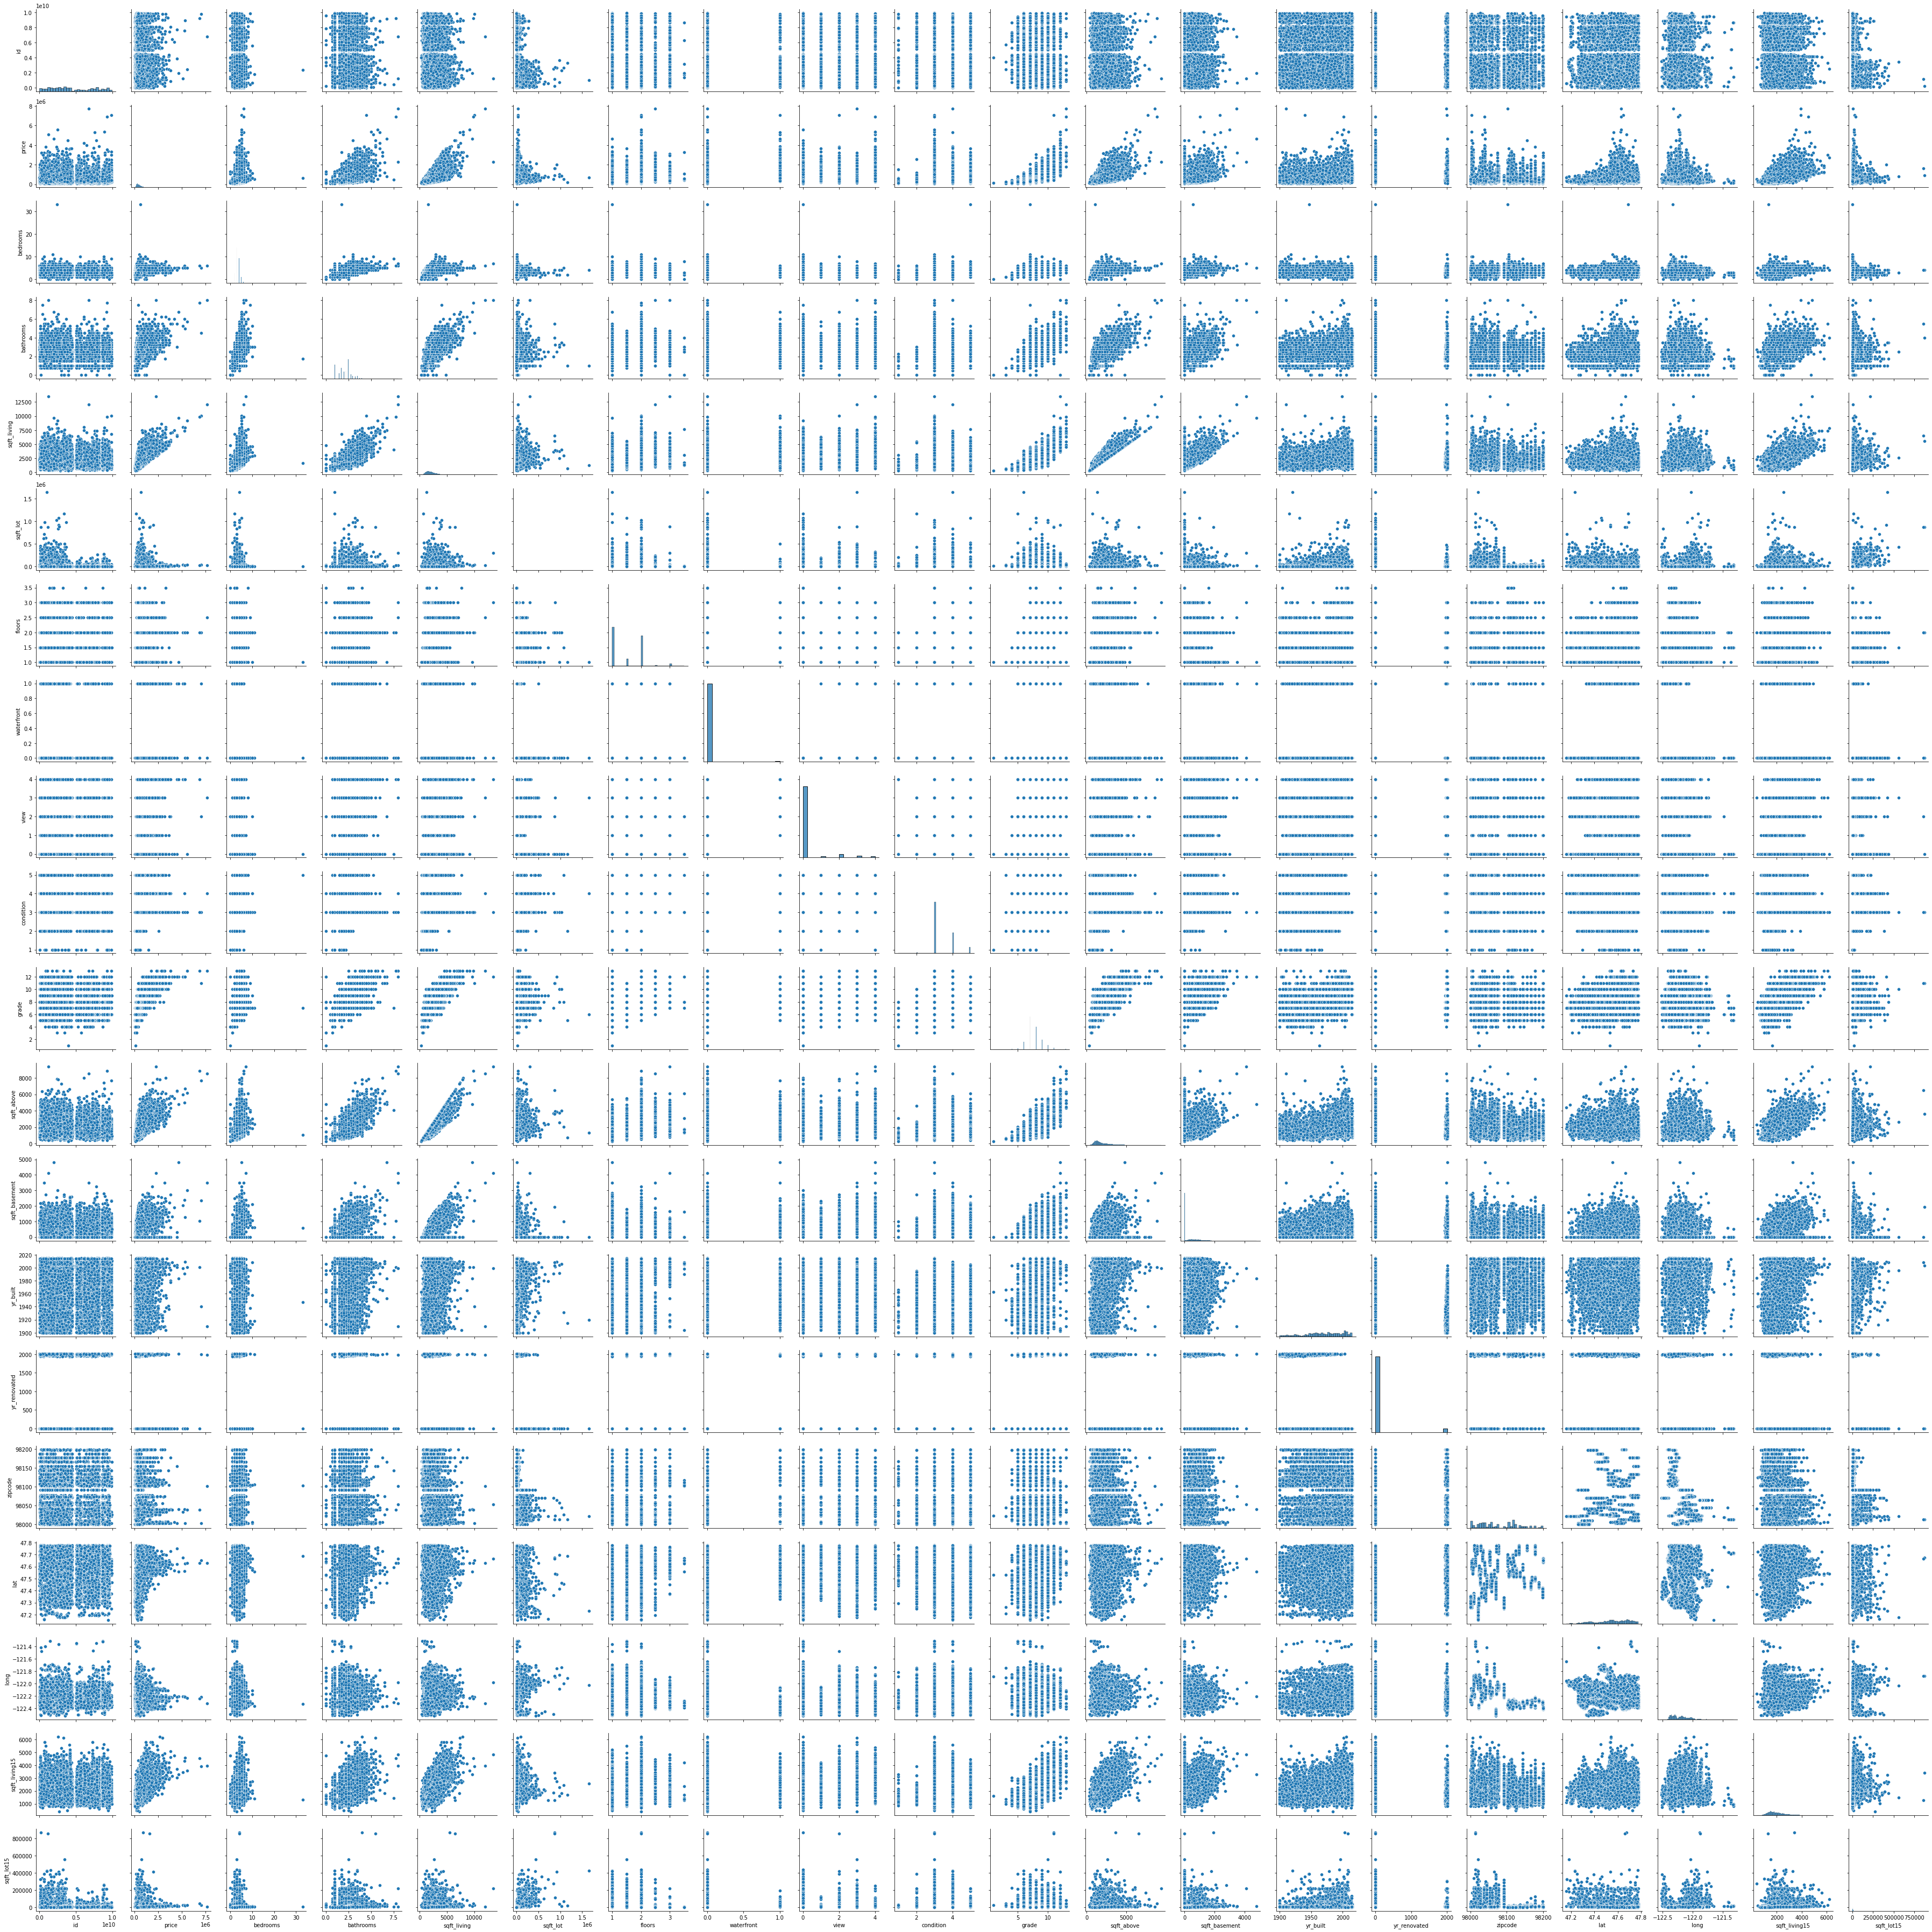

In [15]:
# Calculate and show pairplot of all the features 
sns.pairplot(data, size=2.5)
plt.tight_layout()

In [16]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 14 }
    )

def category_values(Pclass, Survived):
    for c in Survived:
        print('\n', Pclass.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', Pclass[c].isnull().sum())

In [17]:
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

<AxesSubplot:>

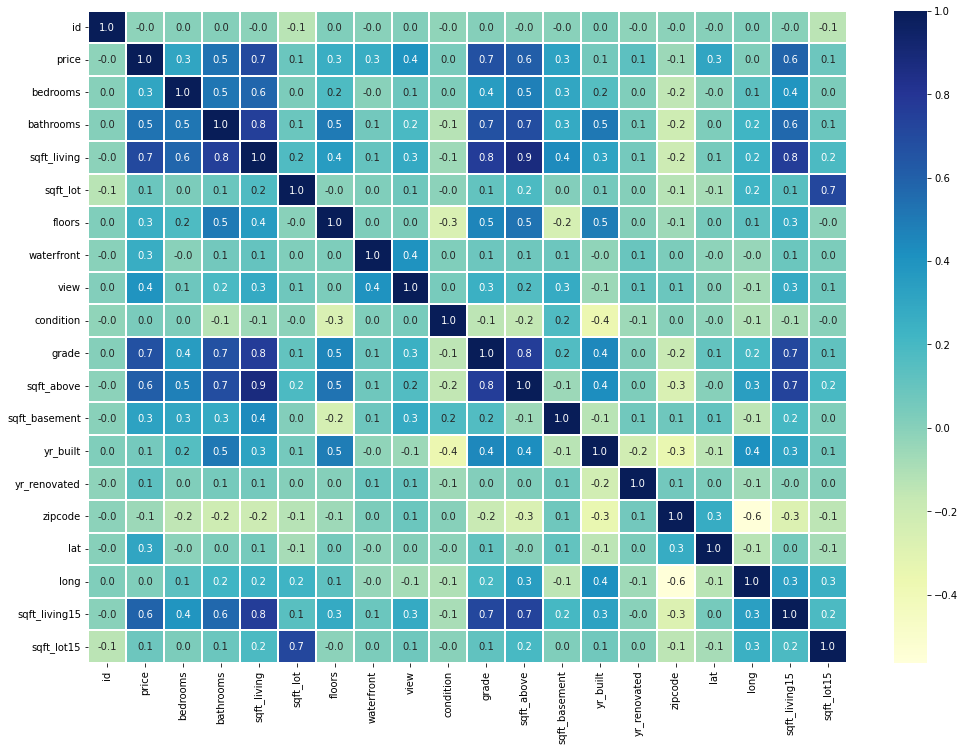

In [18]:
f,ax=plt.subplots(figsize=(17,12))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",linewidths=.1,fmt='.1f',ax=ax)

In [103]:
plt.scatter(data[["floors"]] ,data["price"],color="r")
plt.title("floors vs price")
plt.ylabel("price")
plt.xlabel("floors")

Text(0.5, 0, 'floors')

Text(0.5, 0, 'bathrooms')

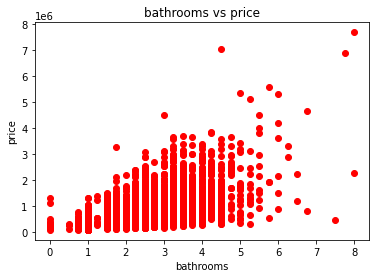

In [20]:
plt.scatter(data[["bathrooms"]] ,data["price"],color="r")
plt.title("bathrooms vs price")
plt.ylabel("price")
plt.xlabel("bathrooms")

In [21]:
plt.scatter(data[["bedrooms"]] ,data["price"],color="r")
plt.title("bedrooms vs price")
plt.ylabel("price")
plt.xlabel("bedrooms")

Text(0.5, 0, 'bedrooms')

In [22]:
plt.scatter(data[["sqft_lot"]] ,data["price"],color="r")
plt.title("sqft_lot vs price")
plt.ylabel("price")
plt.xlabel("sqft_lot")

Text(0.5, 0, 'sqft_lot')

In [23]:
plt.scatter(data[["sqft_living"]] ,data["price"],color="r")
plt.title("sqft_living vs price")
plt.ylabel("price")
plt.xlabel("sqft_living")

Text(0.5, 0, 'sqft_living')

Text(0.5, 0, 'waterfront')

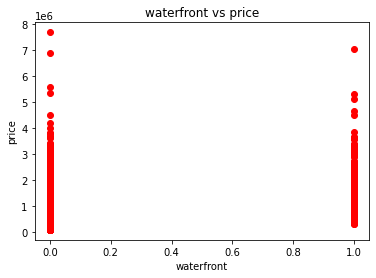

In [24]:
plt.scatter(data[["waterfront"]] ,data["price"],color="r")
plt.title("waterfront vs price")
plt.ylabel("price")
plt.xlabel("waterfront")

Text(0.5, 0, 'view')

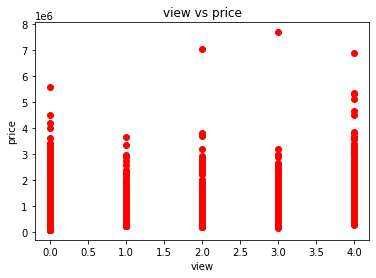

In [25]:
plt.scatter(data[["view"]] ,data["price"],color="r")
plt.title("view vs price")
plt.ylabel("price")
plt.xlabel("view")

In [26]:
plt.scatter(data[["condition"]] ,data["price"],color="r")
plt.title("condition vs price")
plt.ylabel("price")
plt.xlabel("condition")

Text(0.5, 0, 'condition')

Text(0.5, 0, 'grade')

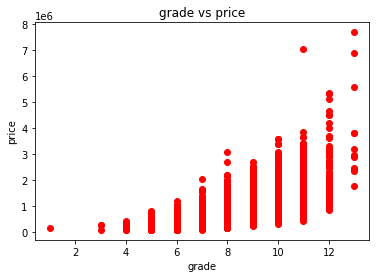

In [27]:
plt.scatter(data[["grade"]] ,data["price"],color="r")
plt.title("grade vs price")
plt.ylabel("price")
plt.xlabel("grade")

Text(0.5, 0, 'sqft_above')

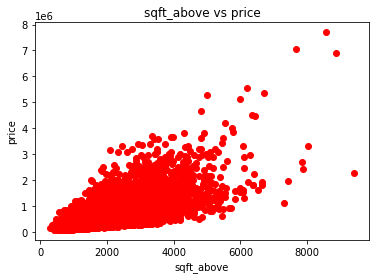

In [28]:
plt.scatter(data[["sqft_above"]] ,data["price"],color="r")
plt.title("sqft_above vs price")
plt.ylabel("price")
plt.xlabel("sqft_above")

In [29]:
plt.scatter(data[["sqft_basement"]] ,data["price"],color="r")
plt.title("sqft_basement vs price")
plt.ylabel("price")
plt.xlabel("sqft_basement")

Text(0.5, 0, 'sqft_basement')

Text(0.5, 0, 'yr_built')

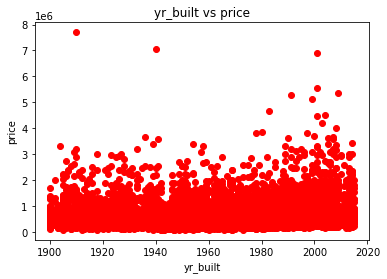

In [30]:
plt.scatter(data[["yr_built"]] ,data["price"],color="r")
plt.title("yr_built vs price")
plt.ylabel("price")
plt.xlabel("yr_built")

Text(0.5, 0, 'yr_renovated')

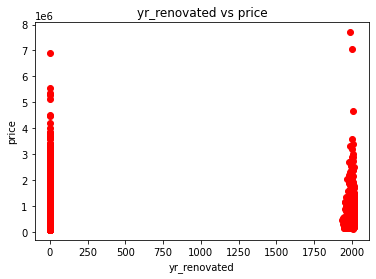

In [31]:
plt.scatter(data[["yr_renovated"]] ,data["price"],color="r")
plt.title("yr_renovated vs price")
plt.ylabel("price")
plt.xlabel("yr_renovated")

Text(0.5, 0, 'lat')

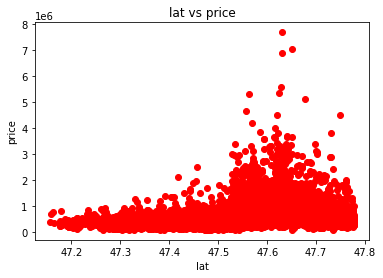

In [32]:
plt.scatter(data[["lat"]] ,data["price"],color="r")
plt.title("lat vs price")
plt.ylabel("price")
plt.xlabel("lat")

Text(0.5, 0, 'long')

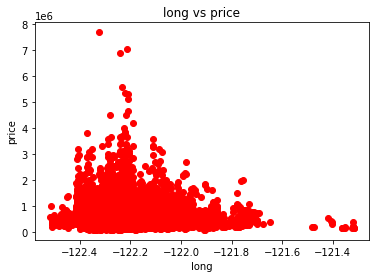

In [33]:
plt.scatter(data[["long"]] ,data["price"],color="r")
plt.title("long vs price")
plt.ylabel("price")
plt.xlabel("long")

## 2. Write a paragraph selecting the most important features (feature selection). 

Since we want to predict the price, in my opinion, sqft_living15, sqft_lot15 don't affect because we already have them without the date "2015", and even the date doesn't affect the other features. For the features id and zipcode, they don't affect the price in anyway.
The most important features are :
bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat and long.

## Visualization of the features that we want to drop :

Text(0.5, 0, 'sqft_living15')

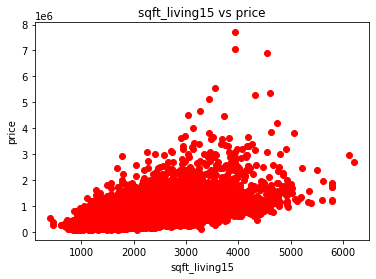

In [34]:
plt.scatter(data[["sqft_living15"]] ,data["price"],color="r")
plt.title("sqft_living15 vs price")
plt.ylabel("price")
plt.xlabel("sqft_living15")

Text(0.5, 0, 'sqft_lot15')

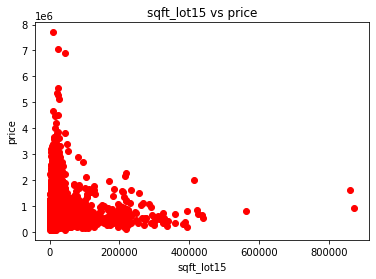

In [35]:
plt.scatter(data[["sqft_lot15"]] ,data["price"],color="r")
plt.title("sqft_lot15 vs price")
plt.ylabel("price")
plt.xlabel("sqft_lot15")

Text(0.5, 0, 'id')

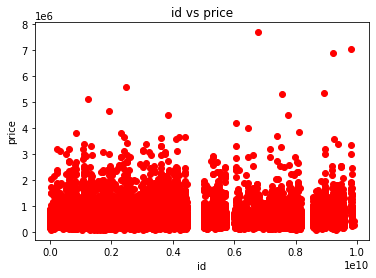

In [36]:
plt.scatter(data[["id"]] ,data["price"],color="r")
plt.title("id vs price")
plt.ylabel("price")
plt.xlabel("id")

Text(0.5, 0, 'zipcode')

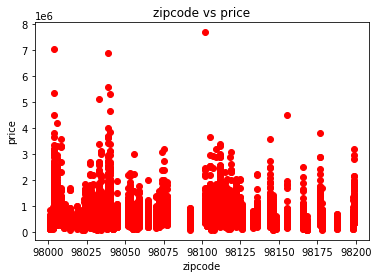

In [37]:
plt.scatter(data[["zipcode"]] ,data["price"],color="r")
plt.title("zipcode vs price")
plt.ylabel("price")
plt.xlabel("zipcode")

## 3. Split your dataset into a training set and a testing set.

## Dropping !

In [38]:
data = data.drop(['sqft_living15','sqft_lot15','id','zipcode'], axis=1)
data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0         3       1.00         1180      5650   
1      20141209T000000  538000.0         3       2.25         2570      7242   
2      20150225T000000  180000.0         2       1.00          770     10000   
3      20141209T000000  604000.0         4       3.00         1960      5000   
4      20150218T000000  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0         3       2.50         1530      1131   
21609  20150223T000000  400000.0         4       2.50         2310      5813   
21610  20140623T000000  402101.0         2       0.75         1020      1350   
21611  20150116T000000  400000.0         3       2.50         1600      2388   
21612  20141015T000000  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  
0          1955             0  47.5112 -122.257  
1          1951          1991  47.7210 -122.319  
2          1933             0  47.7379 -122.233  
3          1965             0  47.5208 -122.393  
4          1987             0  47.6168 -122.045  
...         ...           ...      ...      ...  
21608      2009             0  47.6993 -122.346  
21609      2014             0  47.5107 -122.362  
21610      2009             0  47.5944 -122.299  
21611      2004             0  47.5345 -122.069  
21612      2008             0  47.5941 -122.299  

[21613 rows x 17 columns]

In [39]:
data.corr()['price'].sort_values()

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [40]:
#Removing the unncessary values in date
data['date']=[x[:8] for x in data['date']]
data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      20141013  221900.0         3       1.00         1180      5650     1.0   
1      20141209  538000.0         3       2.25         2570      7242     2.0   
2      20150225  180000.0         2       1.00          770     10000     1.0   
3      20141209  604000.0         4       3.00         1960      5000     1.0   
4      20150218  510000.0         3       2.00         1680      8080     1.0   
...         ...       ...       ...        ...          ...       ...     ...   
21608  20140521  360000.0         3       2.50         1530      1131     3.0   
21609  20150223  400000.0         4       2.50         2310      5813     2.0   
21610  20140623  402101.0         2       0.75         1020      1350     2.0   
21611  20150116  400000.0         3       2.50         1600      2388     2.0   
21612  20141015  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  
0          1955             0  47.5112 -122.257  
1          1951          1991  47.7210 -122.319  
2          1933             0  47.7379 -122.233  
3          1965             0  47.5208 -122.393  
4          1987             0  47.6168 -122.045  
...         ...           ...      ...      ...  
21608      2009             0  47.6993 -122.346  
21609      2014             0  47.5107 -122.362  
21610      2009             0  47.5944 -122.299  
21611      2004             0  47.5345 -122.069  
21612      2008             0  47.5941 -122.299  

[21613 rows x 17 columns]

In [41]:
#changing date into real format
data['date']=pd.to_datetime(data["date"])
data

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  
0          1955             0  47.5112 -122.257  
1          1951          1991  47.7210 -122.319  
2          1933             0  47.7379 -122.233  
3          1965             0  47.5208 -122.393  
4          1987             0  47.6168 -122.045  
...         ...           ...      ...      ...  
21608      2009             0  47.6993 -122.346  
21609      2014             0  47.5107 -122.362  
21610      2009             0  47.5944 -122.299  
21611      2004             0  47.5345 -122.069  
21612      2008             0  47.5941 -122.299  

[21613 rows x 17 columns]

<AxesSubplot:>

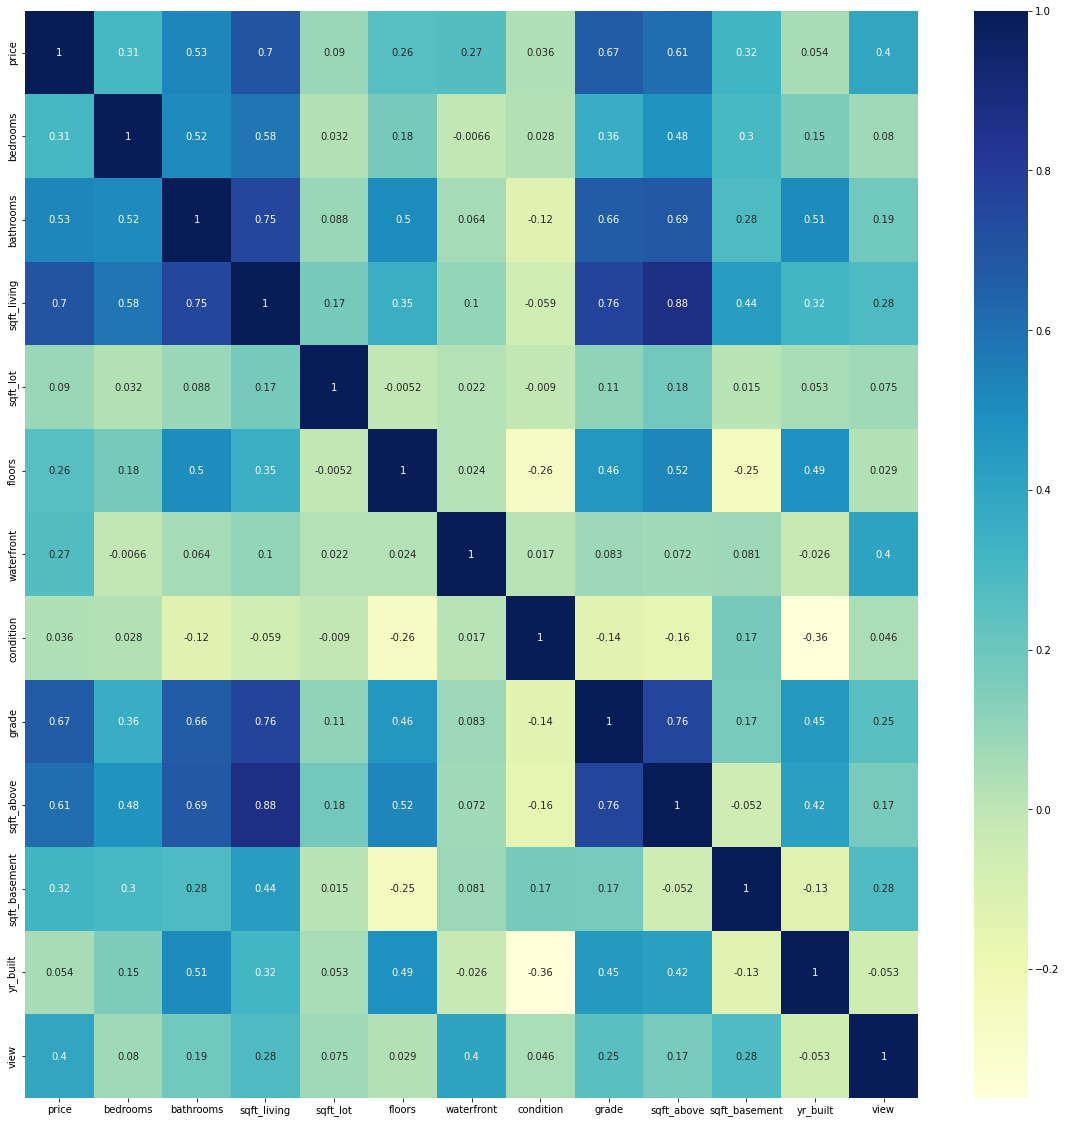

In [108]:
#heatmap for all the required features for correlation
df=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built','view','date']]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

In [43]:
data.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   

               sqft_basement  yr_built  yr_renovated       lat      long  
price               0.323816  0.054012      0.126434  0.307003  0.021626  
bedrooms            0.303093  0.154178      0.018841 -0.008931  0.129473  
bathrooms           0.283770  0.506019      0.050739  0.024573  0.223042  
sqft_living         0.435043  0.318049      0.055363  0.052529  0.240223  
sqft_lot            0.015286  0.053080      0.007644 -0.085683  0.229521  
floors             -0.245705  0.489319      0.006338  0.049614  0.125419  
waterfront          0.080588 -0.026161      0.092885 -0.014274 -0.041910  
view                0.276947 -0.053440      0.103917  0.006157 -0.078400  
condition           0.174105 -0.361417     -0.060618 -0.014941 -0.106500  
grade               0.168392  0.446963      0.014414  0.114084  0.198372  
sqft_above         -0.051943  0.423898      0.023285 -0.000816  0.343803  
sqft_basement       1.000000 -0.133124      0.071323  0.110538 -0.144765  
yr_built           -0.133124  1.000000     -0.224874 -0.148122  0.409356  
yr_renovated        0.071323 -0.224874      1.000000  0.029398 -0.068372  
lat                 0.110538 -0.148122      0.029398  1.000000 -0.135512  
long               -0.144765  0.409356     -0.068372 -0.135512  1.000000

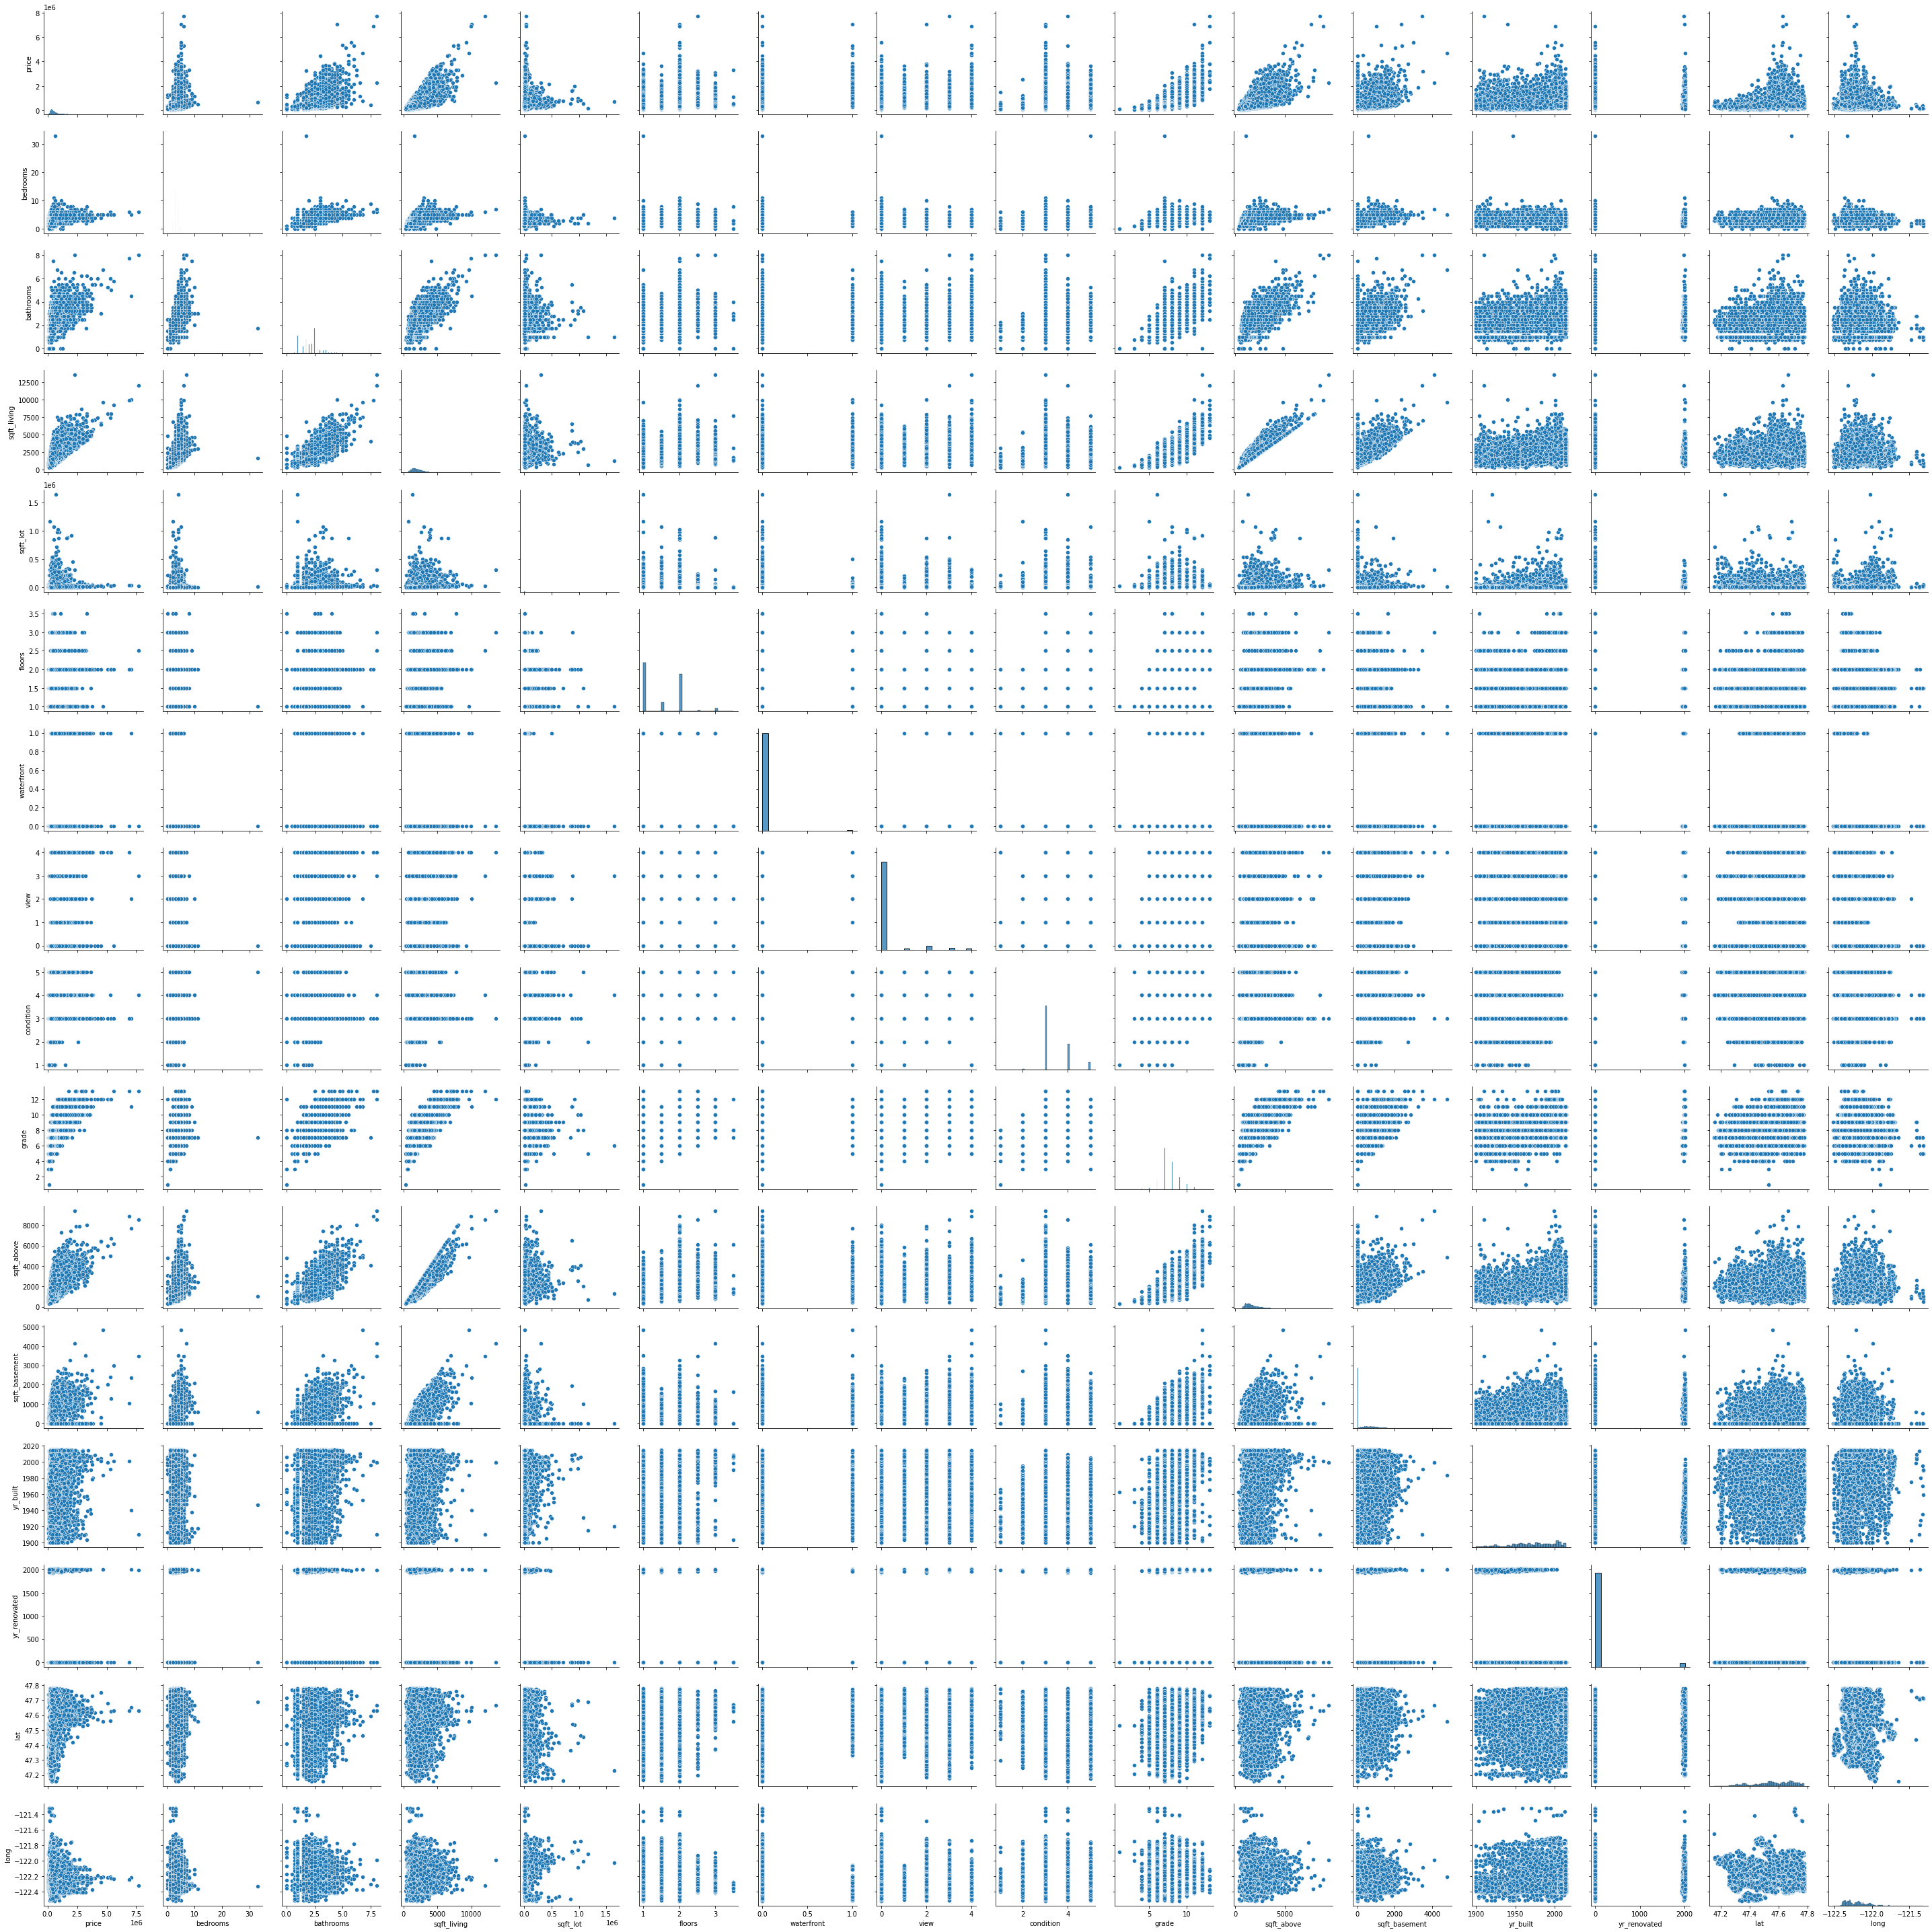

In [44]:
# Calculate and show pairplot 
sns.pairplot(data, size=2.5)
plt.tight_layout()

## Regression !

## 4. Apply Linear regression to your training set. 

In [94]:
x=data[["sqft_living"]] 
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [95]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 67842222652.74759
R squared 0.5008750980131821


In [96]:
predicted=model.predict([[5720]]) #testing our model’s performance
predicted

array([1559450.68209018])

In [97]:
data[data["sqft_living"]==5720]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
9076 2014-07-10  1325000.0         6       4.25         5720     10213   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
9076     2.0           0     0          3     10        4170           1550   

      yr_built  yr_renovated      lat     long  
9076      2004             0  47.5464 -122.116

## 5. Plot the linear regression :

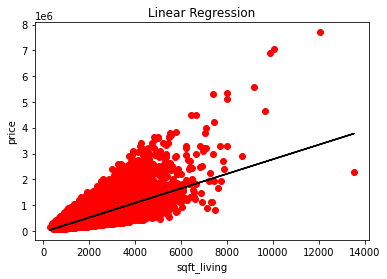

In [49]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

## Apply multi-linear regression and compare it to the linear model. 

In [101]:
#extract x and y from our data
x=data[["bedrooms","sqft_living"]]  #we have more than one input
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 65424370346.51093
R squared 0.518663582060146


In [61]:
predicted=model.predict([[3,5720]])
predicted

array([1718387.22399646])

## Polynomial regression

In [106]:
x=data[["sqft_living","grade","bathrooms","sqft_above","lat","bedrooms","sqft_basement","view","waterfront","condition"]] 
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [107]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 42682101651.448875
R squared 0.6859816944321764


R squared 0.6859816944321764 is already better the previous ones.

In [74]:
predicted=model.predict([[5720,10,4.25,4170,47.5464,6,1550,0,0,3]])
predicted

array([1298860.41939322])

In [109]:
data[data["sqft_living"]==5720] #to compare the values

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
9076 2014-07-10  1325000.0         6       4.25         5720     10213   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
9076     2.0           0     0          3     10        4170           1550   

      yr_built  yr_renovated      lat     long  
9076      2004             0  47.5464 -122.116